In [295]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

dt=pd.read_csv('hygfull.csv')
ms=pd.read_csv('messier.csv')

function with telescope parameters; m: magnification of telescope; afov: apparent field of view of eyepiece; D: aperture size in mm;

6 objects inside FoV



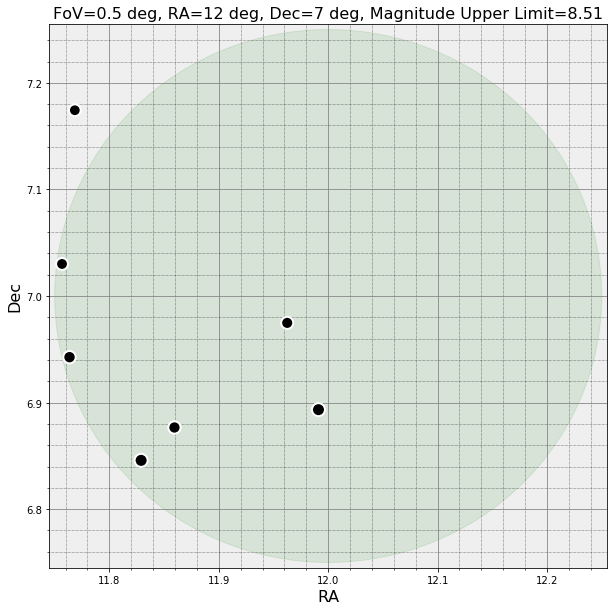

In [301]:
def func1(ra,dec,m,afov,D):
    
    fov=afov/m # true field of view based on magnification and apparent fov of eye piece
    mag=2+5*np.log10(D) # limiting visual magnitude based of aperture
    x=np.pi/180
    # cos(A) = sin(Decl.1)sin(Decl.2) + cos(Decl.1)cos(Decl.2)cos(RA.1 - RA.2); formula for the angular seperation
    dt["distance"]=np.arccos(np.sin(dec*x)*np.sin(dt["Dec"]*x)+np.cos(dec*x)*np.cos(dt["Dec"]*x)*np.cos(ra*x-dt["RA"]*x))*(180/np.pi)

    new_dt= dt[(dt["Mag"]<=mag)]
    
    fig, ax = plt.subplots(figsize=(10,10))

    FoV_obj=dt[(dt["Mag"]<=mag) & (dt["distance"] <=fov/2)]
    print(FoV_obj.shape[0], "objects inside FoV\n") # number of objects within FoV
#     print(FoV_obj) # details of objects within FoV
        
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', color="#838383")
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax.set_facecolor('#EFEFEF')

    ax.scatter(new_dt['RA'], new_dt['Dec'], c='black', edgecolor="white", linewidth=1/fov, label='Stars', s=new_dt['Mag']*10/fov)
    ax.add_artist(plt.Circle((12, 7), fov/2, color='g',zorder=-1, alpha=0.1))
#     ax.scatter(ms['ra'],ms['dec'], s=20, color='red') # messier objects

    ax.set_xlim([ra-fov/2-fov/100,ra+fov/2+fov/100])
    ax.set_ylim([dec-fov/2-fov/100,dec+fov/2+fov/100])
    
    plt.xlabel('RA', fontsize=16)
    plt.ylabel('Dec', fontsize=16)
    plt.title(F"FoV={fov} deg, RA={ra} deg, Dec={dec} deg, Magnitude Upper Limit={mag:.2f}", fontsize=16)

#     for i, txt in enumerate(new_dt['Mag']):
#         ax.annotate(txt, xy=(new_dt['RA'].values[i],new_dt['Dec'].values[i]),textcoords='offset points',xytext=(10,10))
    
func1(12,7,20,10,20) 

Use the following function to enter any upper magnitude and fov values

2012 objects inside FoV



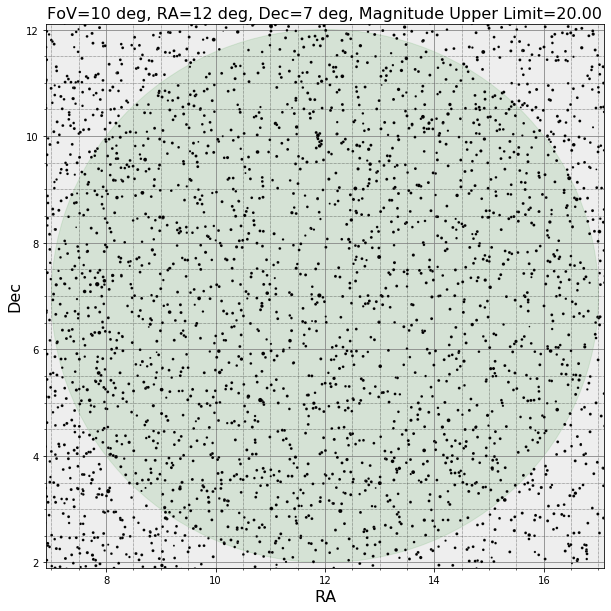

In [303]:
def func2(ra,dec,mag,fov):
    
    x=np.pi/180
    # cos(A) = sin(Decl.1)sin(Decl.2) + cos(Decl.1)cos(Decl.2)cos(RA.1 - RA.2); formula for the angular seperation
    dt["distance"]=np.arccos(np.sin(dec*x)*np.sin(dt["Dec"]*x)+np.cos(dec*x)*np.cos(dt["Dec"]*x)*np.cos(ra*x-dt["RA"]*x))*(180/np.pi)

    new_dt= dt[(dt["Mag"]<=mag)]

    
    fig, ax = plt.subplots(figsize=(10,10))
    
    FoV_obj=dt[(dt["Mag"]<=mag) & (dt["distance"] <=fov/2)]
    print(FoV_obj.shape[0], "objects inside FoV\n") # number of objects within FoV
#     print(FoV_obj) # details of objects within FoV
    
        
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', color="#838383")
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax.set_facecolor('#eeeeee')

    ax.scatter(new_dt['RA'], new_dt['Dec'], c='black', edgecolor="white", linewidth=1/fov, label='Stars', s=new_dt['Mag']*10/fov)
    ax.add_artist(plt.Circle((12, 7), fov/2, color='g',zorder=-1, alpha=0.1))
#     ax.scatter(ms['ra'],ms['dec'], s=20, color='red') # messier objects

    ax.set_xlim([ra-fov/2-fov/100,ra+fov/2+fov/100])
    ax.set_ylim([dec-fov/2-fov/100,dec+fov/2+fov/100])
        
    plt.xlabel('RA', fontsize=16)
    plt.ylabel('Dec', fontsize=16)
    plt.title(F"FoV={fov} deg, RA={ra} deg, Dec={dec} deg, Magnitude Upper Limit={mag:.2f}", fontsize=16)

#     for i, txt in enumerate(new_dt['Mag']):
#         ax.annotate(txt, xy=(new_dt['RA'].values[i],new_dt['Dec'].values[i]),textcoords='offset points',xytext=(10,10))
    
func2(12,7,20,10)